### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#ignoring the warnings while executing code
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing DATASET
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

In [4]:
df.shape

(20640, 10)

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
missing = df.isnull().sum()
print(missing)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

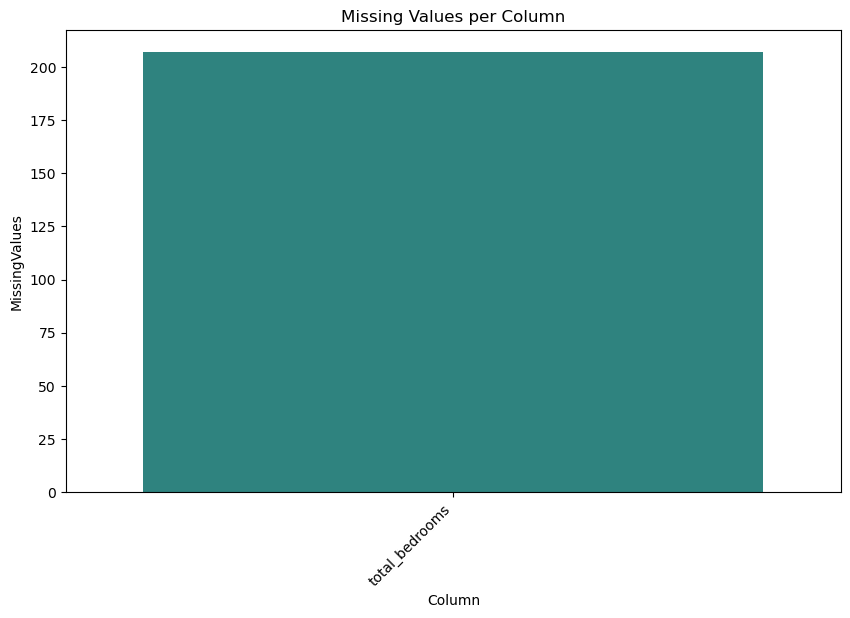

In [9]:
missing = df.isnull().sum().reset_index()
missing.columns = ['Column', 'MissingValues']

plt.figure(figsize=(10,6))
sns.barplot(x='Column', y='MissingValues', data=missing[missing['MissingValues'] > 0], palette='viridis')
plt.title("Missing Values per Column")
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
# Feature engineering
# Handled the missing values
df["total_bedrooms"].fillna(df["total_bedrooms"].mean(),inplace=True)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['income_per_person'] = df['median_income'] / df['population']
df['bedrooms_ratio'] = df['total_bedrooms'] / df['total_rooms']
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  population_per_household  20640 non-null  float64
 12  bedrooms_per_household    20640 non-null  float64
 13  income_per_person         20640 non-null  float64
 14  bedroo

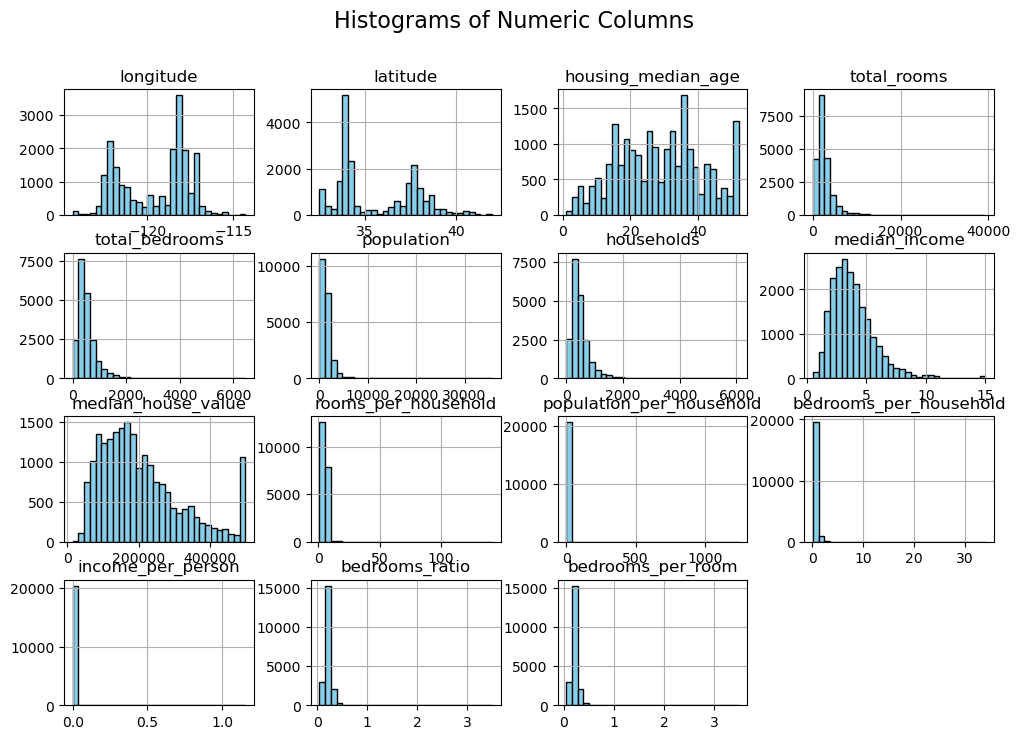

In [12]:
# Histogram for all numeric columns
df.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", size=16)
plt.show()

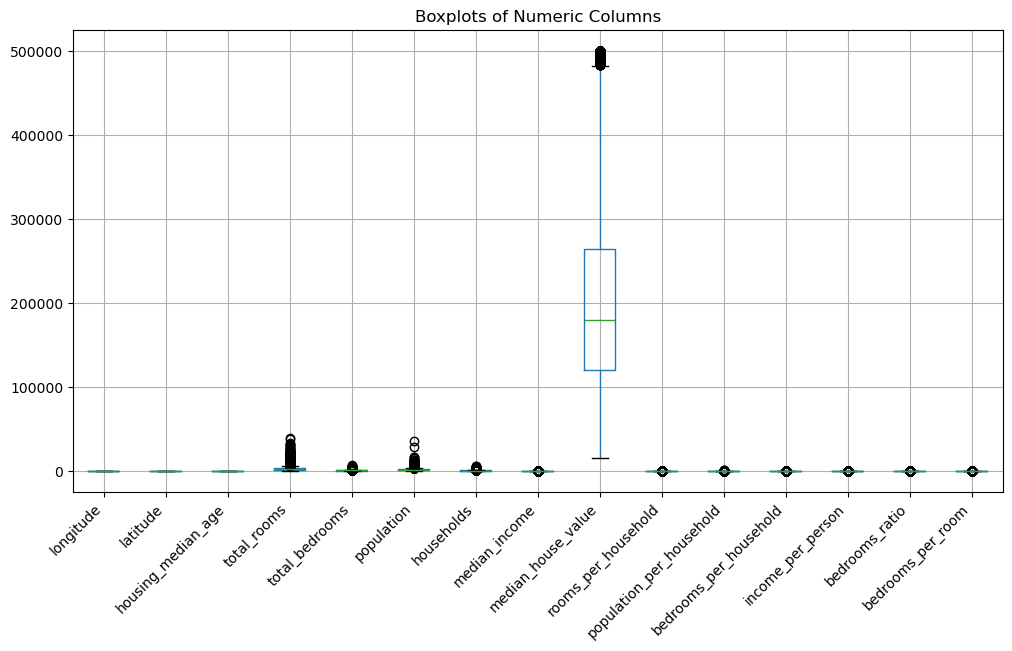

In [13]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=45, ha='right')
plt.show()


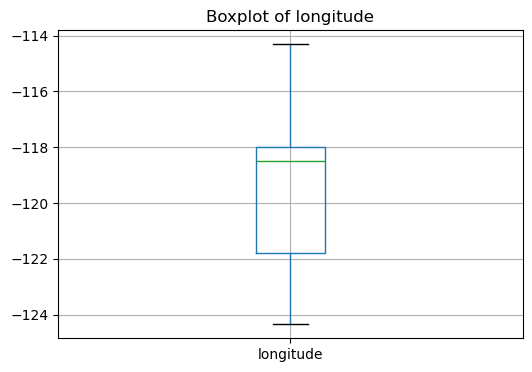

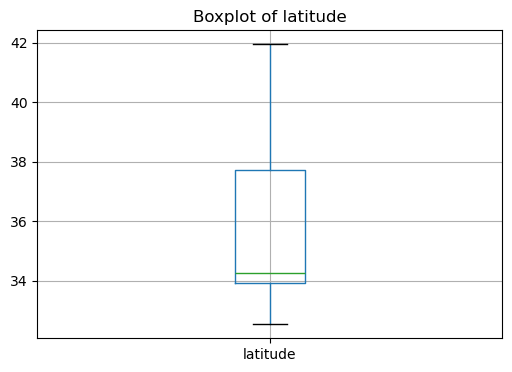

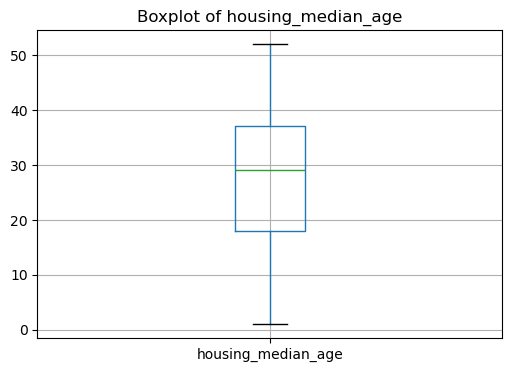

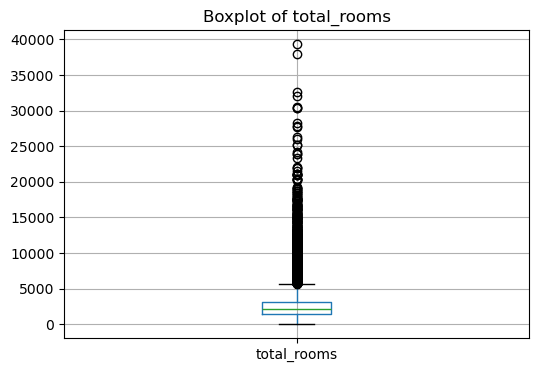

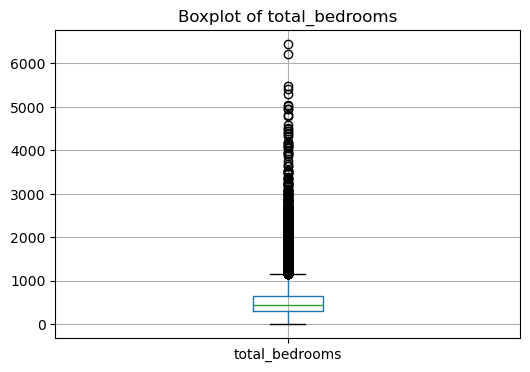

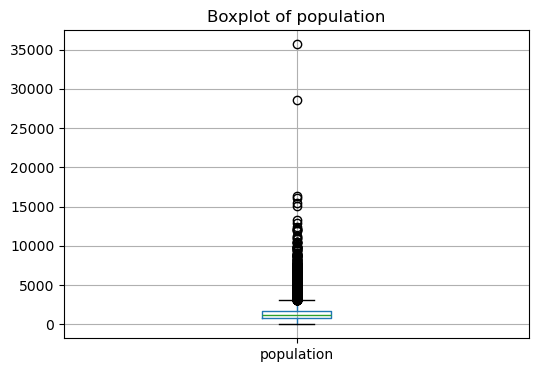

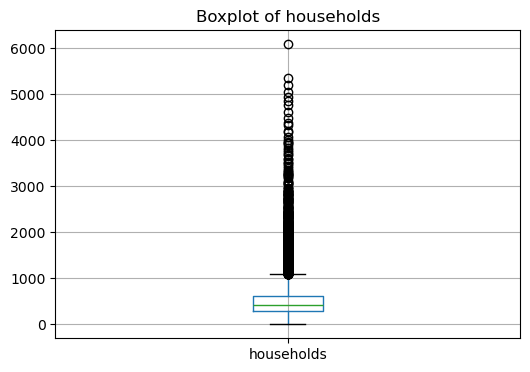

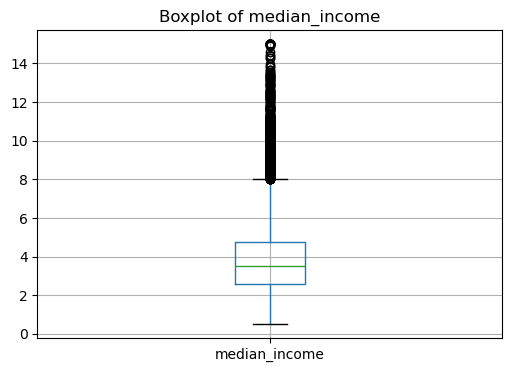

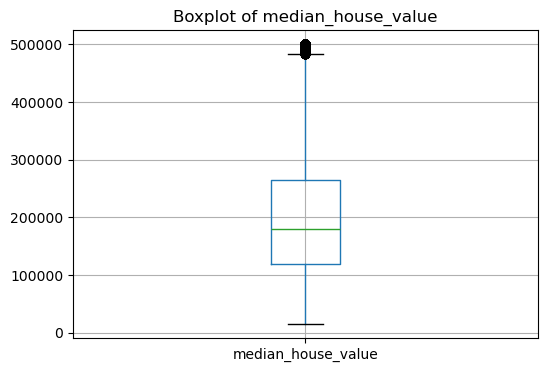

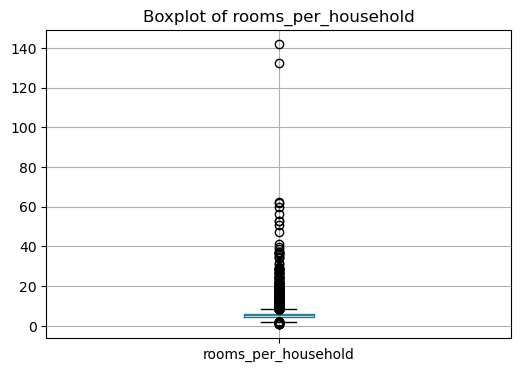

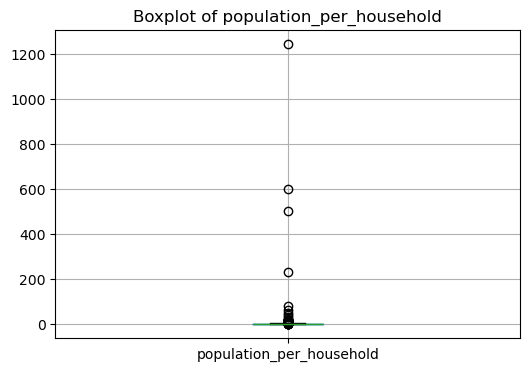

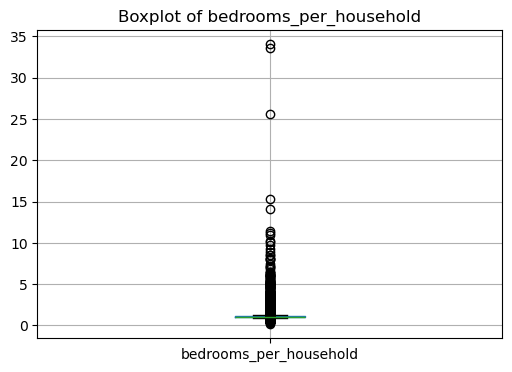

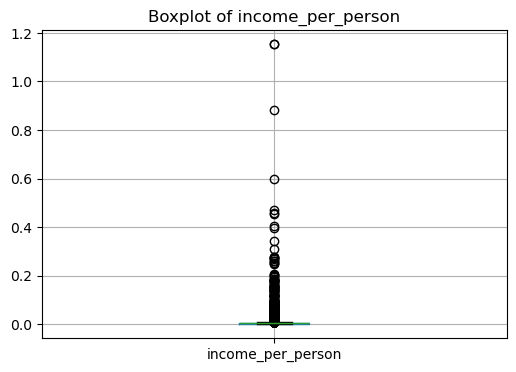

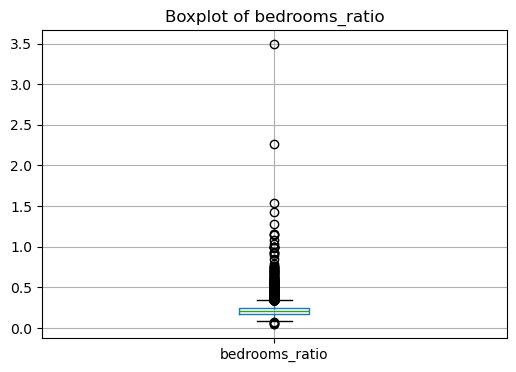

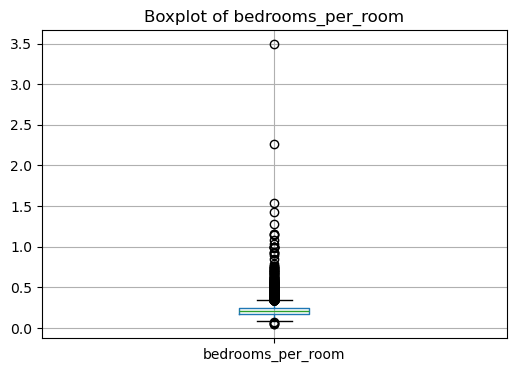

In [14]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [15]:
# --- Outlier Handling for target ---
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
df['median_house_value'] = np.where(df['median_house_value'] > upper_bound, upper_bound, df['median_house_value'])
df['median_house_value'] = np.where(df['median_house_value'] < lower_bound, lower_bound, df['median_house_value'])


In [16]:
print("Outliers handled. New max/min values:")
print(df['median_house_value'].max(), df['median_house_value'].min())

Outliers handled. New max/min values:
482412.5 14999.0


In [17]:
# --- Encoding Categorical Feature ---
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [18]:
# --- Log-transform Skewed Features ---
skewed_cols = ["total_rooms", "total_bedrooms", "population", "households", "rooms_per_household", "population_per_household"]
for col in skewed_cols:
    df[col] = np.log1p(df[col])

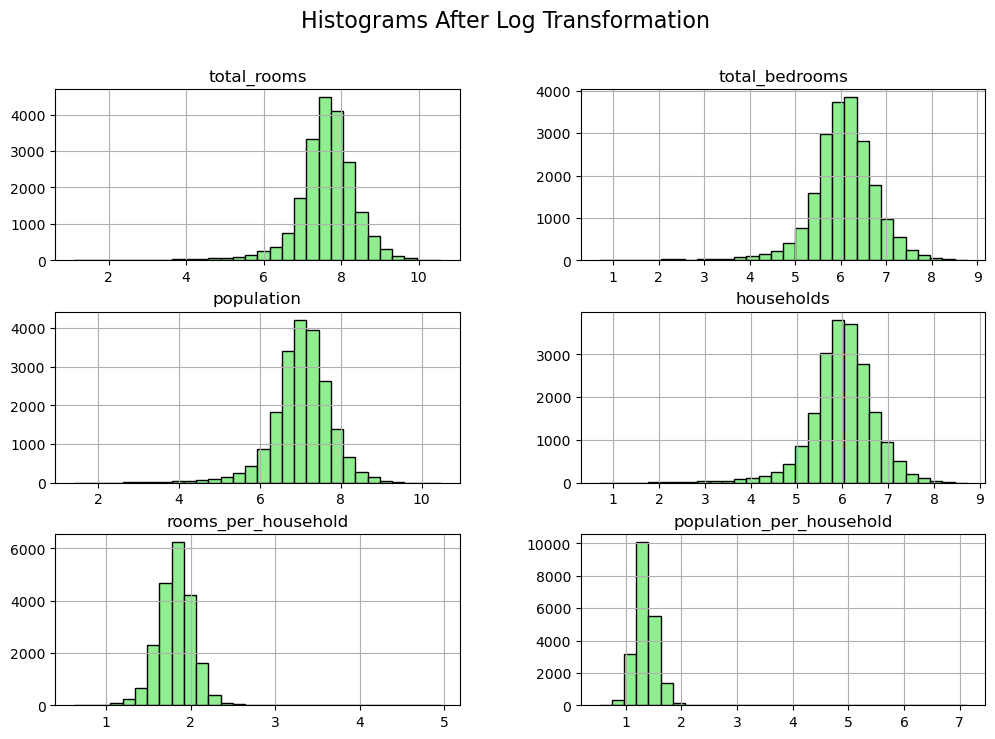

In [19]:
# Check the distributions again (optional)
df[skewed_cols].hist(figsize=(12, 8), bins=30, color='lightgreen', edgecolor='black')
plt.suptitle("Histograms After Log Transformation", size=16)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  int32  
 10  rooms_per_household       20640 non-null  float64
 11  population_per_household  20640 non-null  float64
 12  bedrooms_per_household    20640 non-null  float64
 13  income_per_person         20640 non-null  float64
 14  bedroo

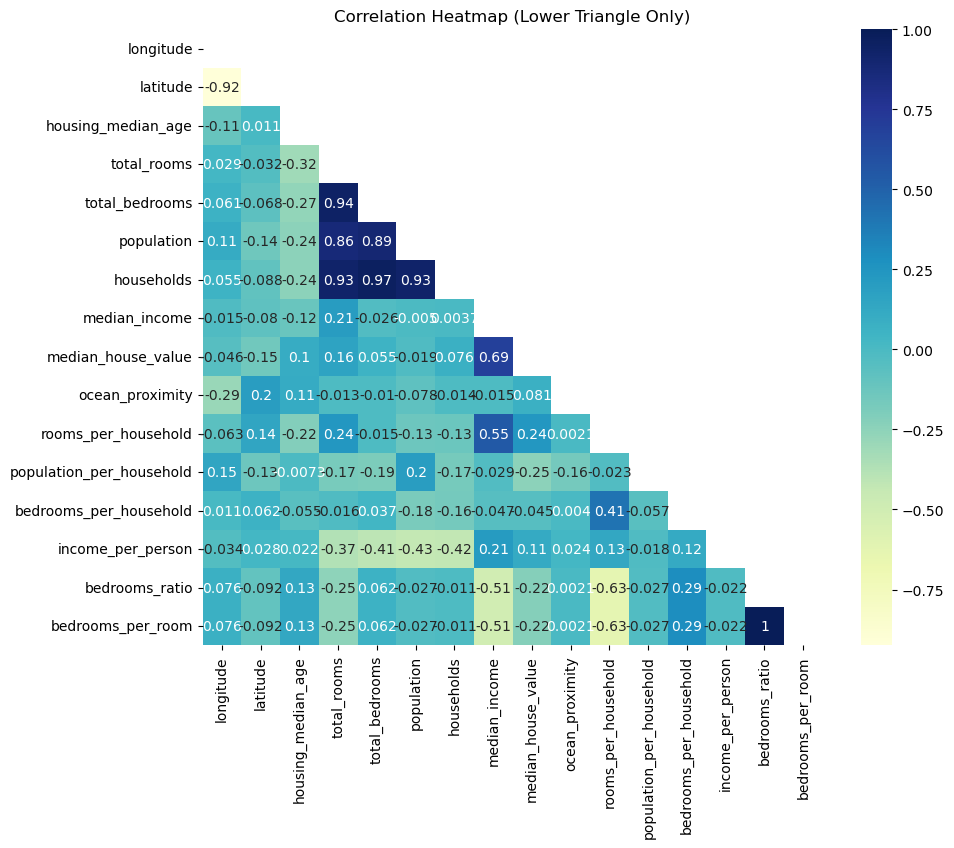

In [21]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle

plt.figure(figsize=(10,8))
sns.heatmap(corr, mask = mask,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap (Lower Triangle Only)")
plt.show()

Here’s what it shows:

Longitude & latitude are highly negatively correlated (-0.92) → makes sense geographically.

Total_rooms, total_bedrooms, population, households are all very strongly correlated (0.86–0.97) → these features carry overlapping information.

Median_income & median_house_value are positively correlated (0.69) → higher income areas have higher house values (important predictive feature).

Ocean_proximity is categorical (likely encoded as numbers), so its correlations with numeric features are weak and not very meaningful.

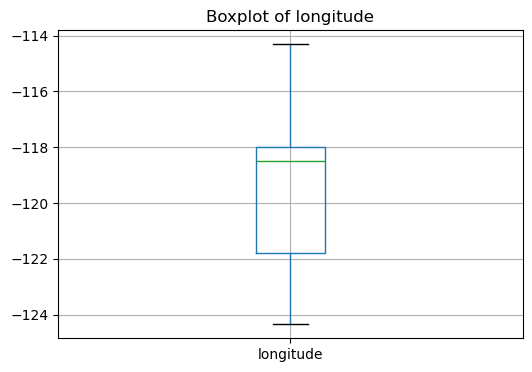

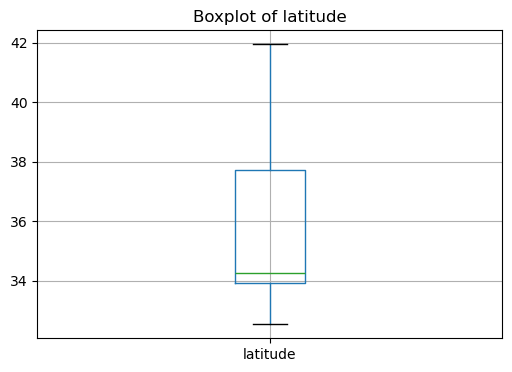

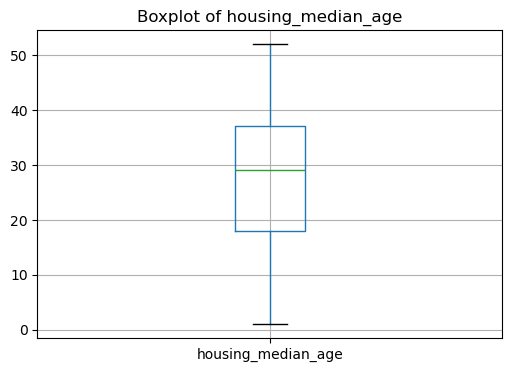

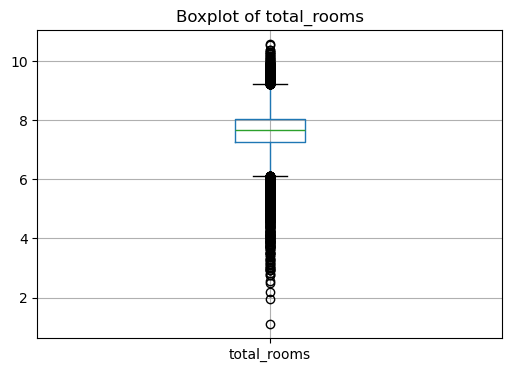

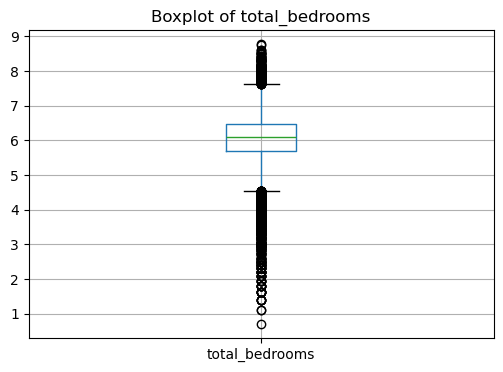

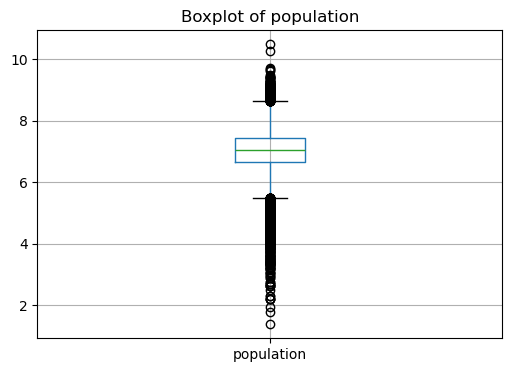

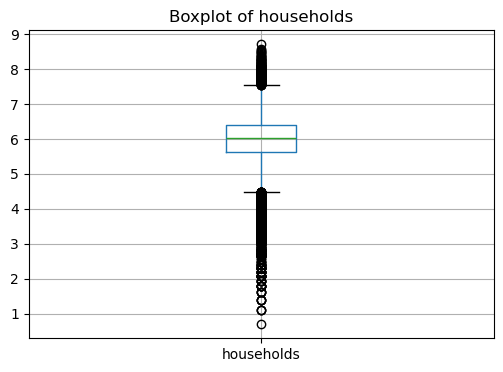

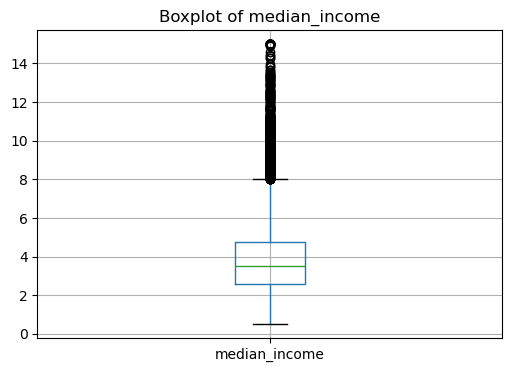

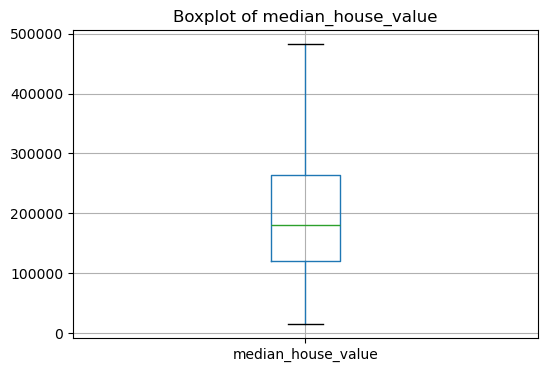

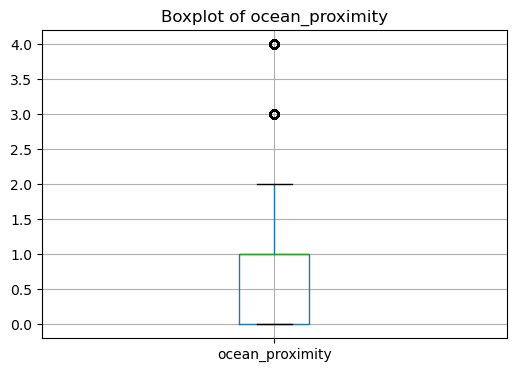

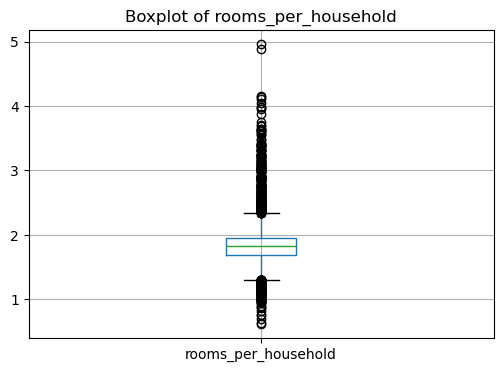

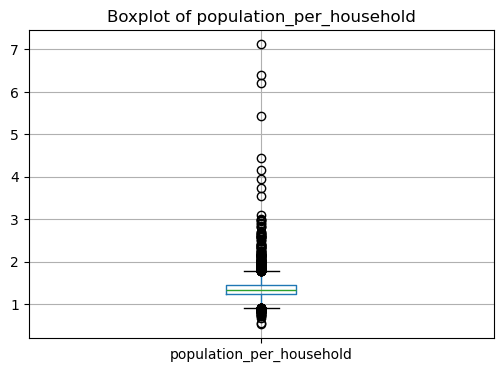

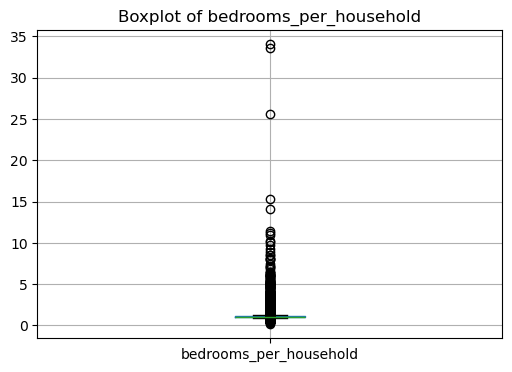

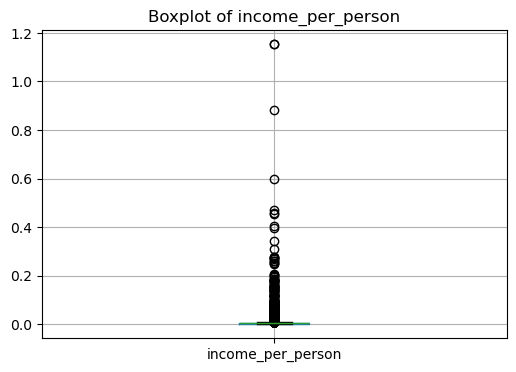

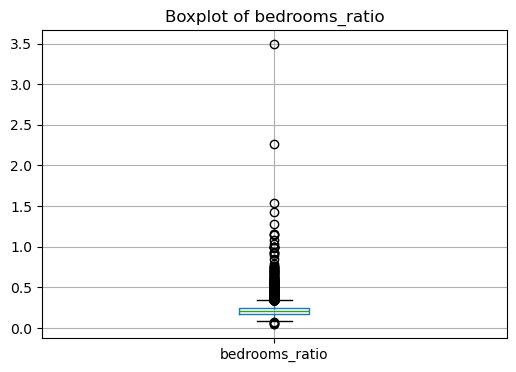

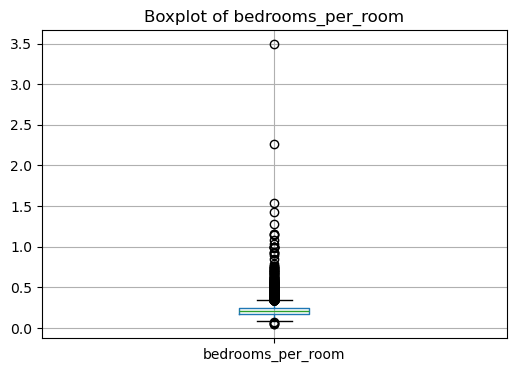

In [22]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

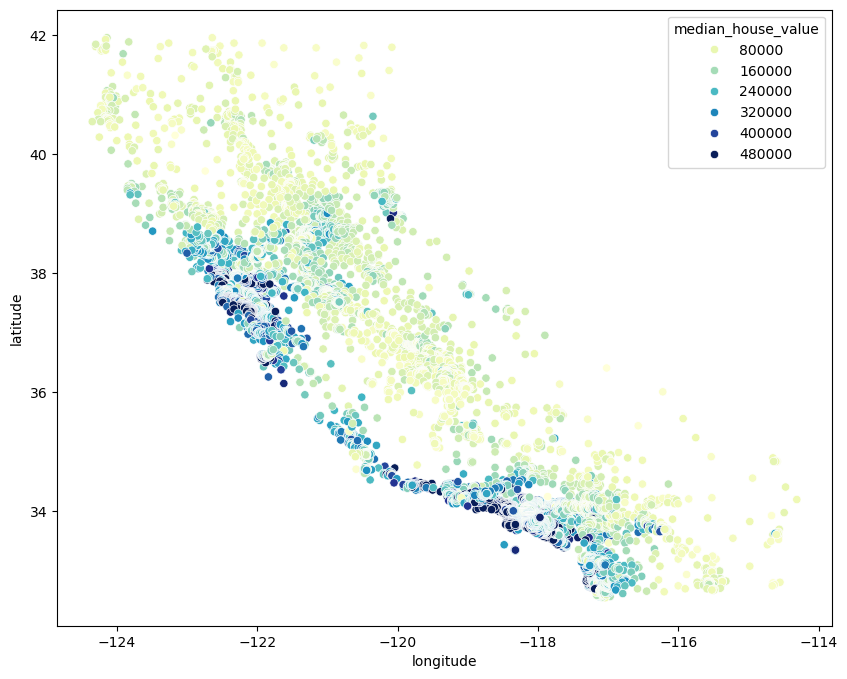

In [23]:
plt.figure(figsize=(10,8)) 
sns.scatterplot(x="longitude",y="latitude",data=df,hue="median_house_value",palette="YlGnBu")
plt.show()

# Modelling

In [24]:
# Scale features (for Linear / Regularized models)
from sklearn.preprocessing import StandardScaler

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# --- Models ---
linear = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1).fit(X_train, y_train)
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42).fit(X_train, y_train)

In [28]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ----- ---------------------------------- 7.9/56.8 MB 40.4 MB/s eta 0:00:02
   ------------- -------------------------- 19.4/56.8 MB 47.1 MB/s eta 0:00:01
   --------------- ------------------------ 22.5/56.8 MB 35.7 MB/s eta 0:00:01
   ----------------- ---------------------- 25.2/56.8 MB 30.6 MB/s eta 0:00:02
   ------------------- -------------------- 28.0/56.8 MB 27.0 MB/s eta 0:00:02
   --------------------- ------------------ 30.7/56.8 MB 24.6 MB/s eta 0:00:02
   ----------------------- ---------------- 33.3/56.8 MB 23.0 MB/s eta 0:00:02
   ------------------------- -------------- 35.9/56.8 MB 21.5 MB/s eta 0:00:01
   --------------------------- ------------ 38.8/56.8 MB 20.7 MB/s eta 0:00:01
   ----------------------------- ---------- 41.4/56.8 MB 19.9 MB/s eta 0:00:01
   ------------------------------- -------- 44.6/56.8 MB 19.2 MB/s eta 0:00:01
   --------------------------------- ------ 47.4/56.8 MB 18.6 

In [29]:
# --- XGBoost (install xgboost if not already) ---
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=-1, num_parallel_tree=None, ...)

In [30]:
# --- Predictions ---
y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

In [31]:
# --- Evaluation Function ---
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n RMSE: {rmse:,.2f}\n R²: {r2:.4f}\n")


In [32]:
# --- Evaluate All Models ---
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regressor")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

Linear Regression:
 RMSE: 68,034.43
 R²: 0.6339

Ridge Regression:
 RMSE: 71,770.05
 R²: 0.5926

Lasso Regression:
 RMSE: 72,555.70
 R²: 0.5836

Random Forest Regressor:
 RMSE: 49,294.32
 R²: 0.8078

Gradient Boosting Regressor:
 RMSE: 46,673.55
 R²: 0.8277

XGBoost Regressor:
 RMSE: 43,970.10
 R²: 0.8471



In [33]:
from sklearn.model_selection import KFold, cross_val_score

# Define K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Example with Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)

cv_scores = cross_val_score(rf, X, y, cv=kfold, scoring="r2")
print("Random Forest CV R²:", cv_scores)
print("Mean R²:", np.mean(cv_scores))


Random Forest CV R²: [0.78201582 0.79143549 0.77813089 0.8105375  0.78454527]
Mean R²: 0.7893329941245506


In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# Wider + smarter ranges
param_dist = {
    "n_estimators": [300, 500, 800, 1000],   # more boosting rounds
    "max_depth": [3, 5, 7, 10, 15],          # deeper trees
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],  # small to large step sizes
    "subsample": [0.6, 0.8, 1.0],            # row sampling
    "colsample_bytree": [0.6, 0.8, 1.0],     # feature sampling
    "min_child_weight": [1, 3, 5, 10],       # controls overfitting
    "gamma": [0, 0.1, 0.3, 0.5, 1]           # regularization
}

# Randomized search with more iterations
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,         # explore 50 random combos
    scoring="r2",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'subsample': 0.6, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best CV Score: 0.692828114961501


In [37]:
best_xgb = XGBRegressor(
    n_estimators=1000,
    max_depth=7,
    learning_rate=0.1,      # ↑ instead of 0.01
    subsample=0.6,
    colsample_bytree=1.0,
    min_child_weight=3,     # ↓ instead of 10
    gamma=0.3,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

print("XGBoost Test R²:", r2_score(y_test, y_pred))
print("XGBoost Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

XGBoost Test R²: 0.8393200013886648
XGBoost Test RMSE: 45072.91246569118


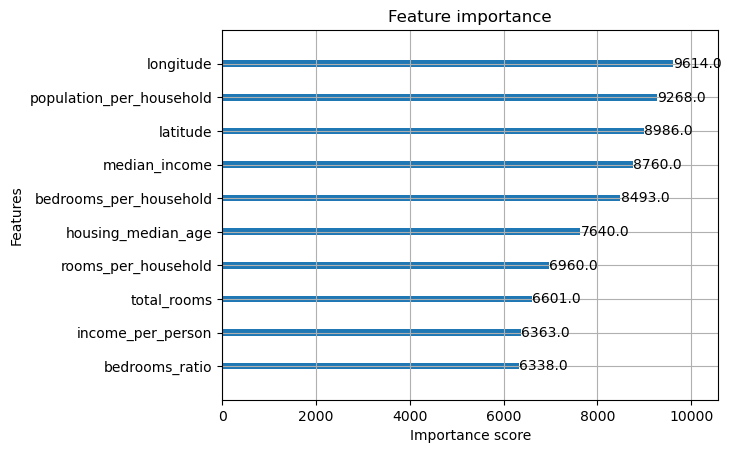

In [38]:
from xgboost import plot_importance
plot_importance(best_xgb, max_num_features=10)
plt.show()


<Figure size 1000x600 with 0 Axes>

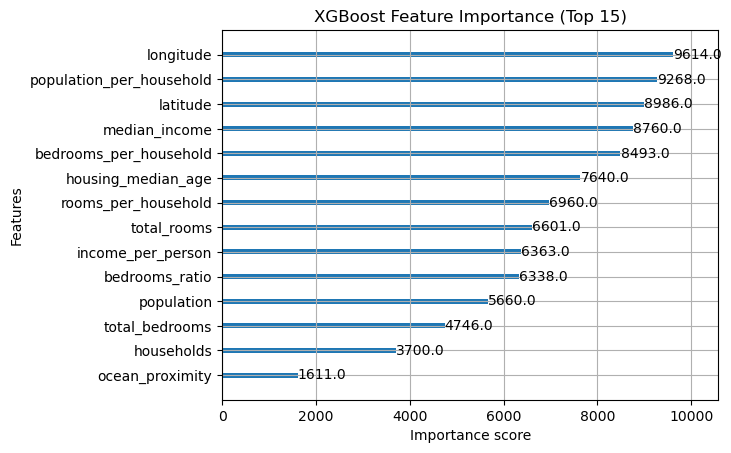

In [39]:
from xgboost import plot_importance

# Plot top 15 important features
plt.figure(figsize=(10,6))
plot_importance(best_xgb, max_num_features=15, importance_type="weight")
plt.title("XGBoost Feature Importance (Top 15)")
plt.show()


In [41]:
!pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 9.1 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)


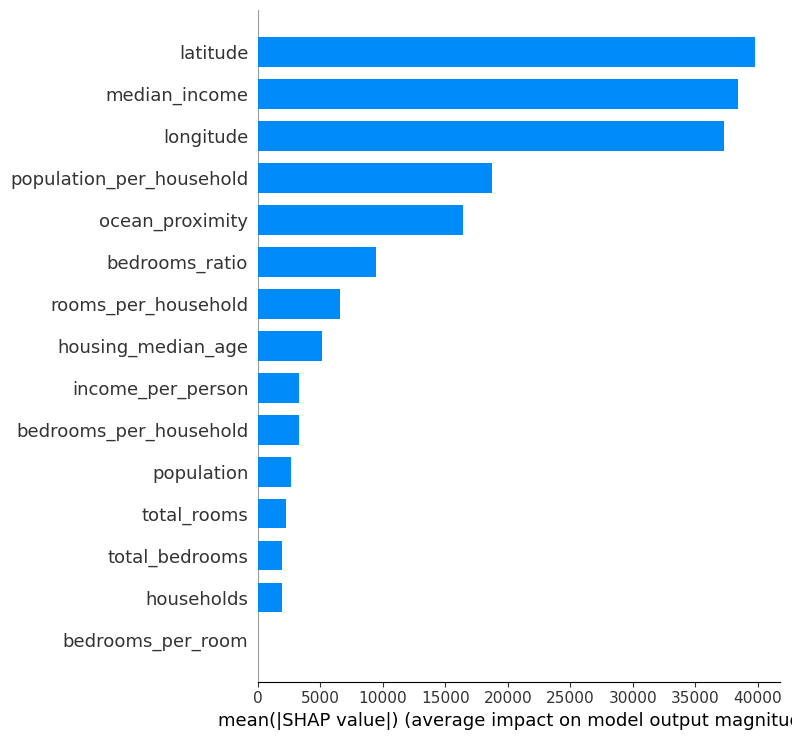

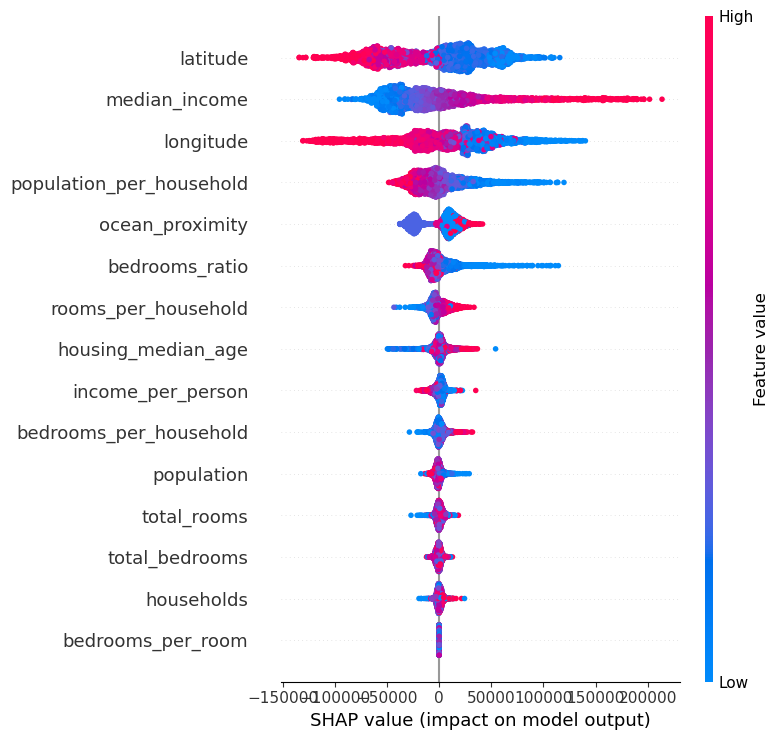

In [42]:
import shap

# Explain model predictions using SHAP
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot (global importance + direction of effect)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed summary plot (distribution of SHAP values per feature)
shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction (example: first test sample)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
